# Task 2.3 Visualize Quantum States

Visualizing quantum states can be done using Bloch multivector plots and Q-sphere representations in Qiskit. These visualizations provide intuitive ways to understand multi-qubit quantum states and their properties.

## Objective 1: Bloch Multivector Visualization

The `plot_bloch_multivector` function displays multiple Bloch spheres, one for each qubit in a multi-qubit system. Each sphere shows the expectation values of the Pauli operators (X, Y, Z) for that specific qubit.

It is most effective for examining the state of individual qubits within multi-qubit systems. However, it can not show entanglement or phase relationships between qubits. and Its primary use case is analyzing how quantum gates influence each qubit in a circuit.

Statevector: Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j],
            dims=(2, 2))


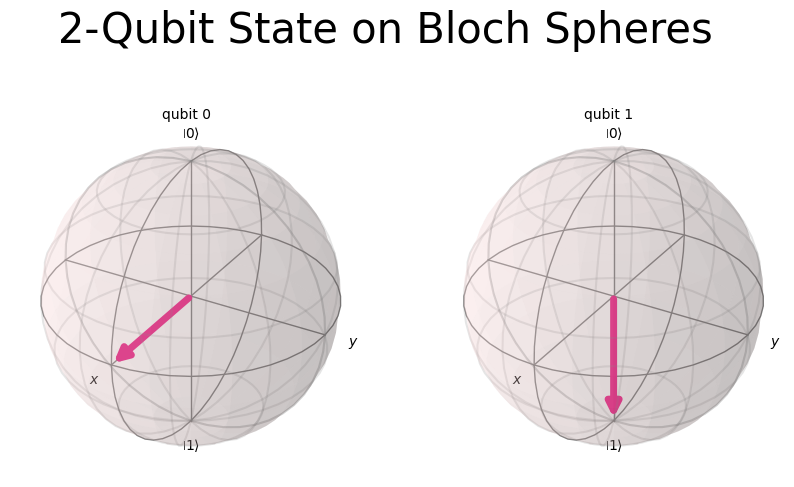

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
 
# Create a simple 2-qubit circuit
qc = QuantumCircuit(2)
qc.h(0)    # Apply Hadamard to qubit 0: creates superposition |+⟩ = (|0⟩ + |1⟩)/√2
qc.x(1)    # Apply X gate to qubit 1: flips |0⟩ to |1⟩
 
# Get the statevector representing the quantum state
state = Statevector(qc)
print("Statevector:", state)
 
# Visualize each qubit on its own Bloch sphere
plot_bloch_multivector(state, title="2-Qubit State on Bloch Spheres",figsize=(5,5),title_font_size=30)

# Interpretation:
# - Qubit 0: On x-axis (|+⟩ state) due to Hadamard gate
# - Qubit 1: At south pole (|1⟩ state) due to X gate

### Bloch Multivector with Density Matrix and Reversed Qubit Order

Density matrices can represent mixed states (statistical ensembles) and `reverse_bits` changes the display order of qubits.

Density matrix shape: 8


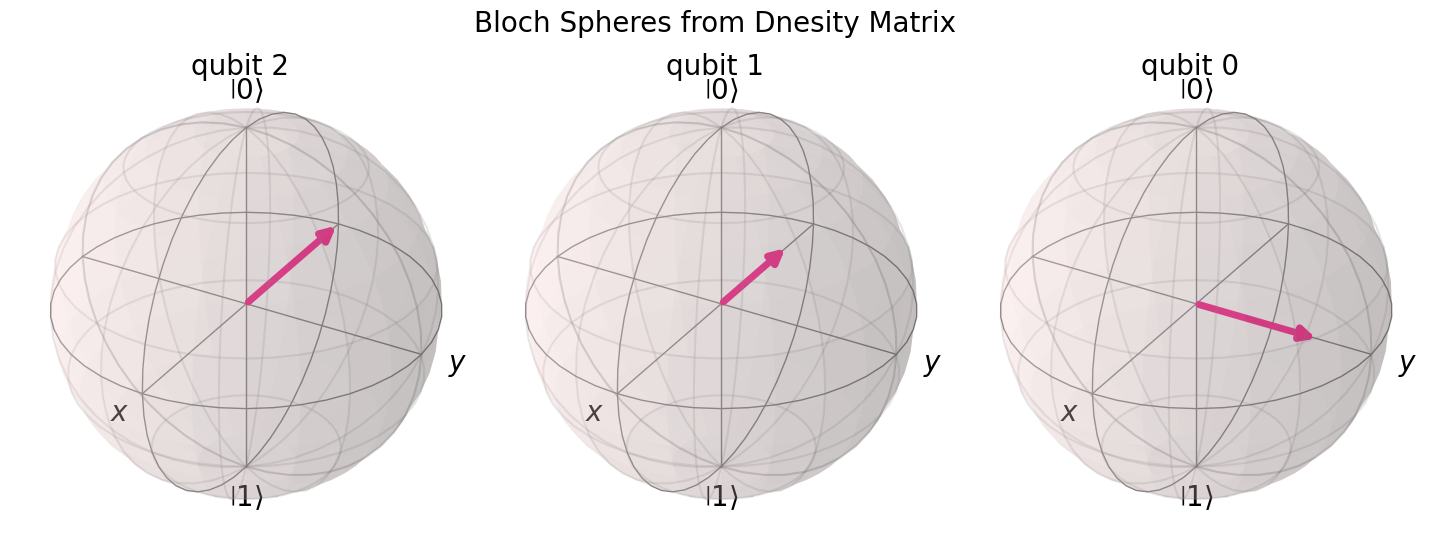

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_bloch_multivector
 
# Create a more complex 3-qubit circuit
qc = QuantumCircuit(3)
qc.h([0, 1,2])    # Hadamard on all qubits: creates |+⟩ ⊗ |+⟩ ⊗ |+⟩ 
qc.t(1)         # T gate on qubit 1: adds π/4 phase (rotation around Z-axis)
qc.s(0)         # S gate on qubit 0: adds π/2 phase (rotation around Z-axis)
qc.z(2)         # Z gate on qubit 2
qc.cx(0, 1)     # CNOT gate: creates entanglement between qubits
qc.cx(1, 2)     # CNOT gate: creates entanglement between qubits
 
# Use DensityMatrix instead of Statevector
# Density matrices can represent both pure and mixed states
matrix = DensityMatrix(qc)
print("Density matrix shape:", matrix.dim)
 
# Visualize with reversed bit order and custom title
plot_bloch_multivector(matrix, 
                     title='Bloch Spheres from Dnesity Matrix', 
                     reverse_bits=True,
                     font_size=20)

# - reverse_bits=True: Qubit 0 appears at the right instead of the left
# - font_size= 20: font size for the figure is larger

## Objective 2: Q-Sphere Visualization

The Q-sphere provides a compact way to visualize multi-qubit states by mapping computational basis states to points on a sphere, with colors and arrows representing phases and amplitudes.

It is most effective for examining the complete multi-qubit quantum state. and it can show entanglement and phase relationships between qubits. However, visualization becomes complex as the nubmer of qubits increase.

Final statevector:
Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


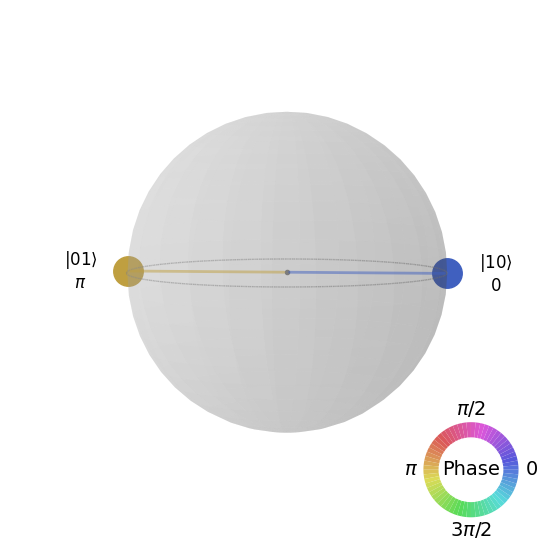

In [34]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
 
# Create a circuit that produces an interesting quantum state
qc = QuantumCircuit(2)
qc.h(0)        # Hadamard: creates superposition
qc.z(0)        # Z gate: adds phase flip to |1⟩ component
qc.x(1)        # X gate: |0⟩ → |1⟩
qc.cx(0, 1)    # CNOT: creates controlled operation
 
# Get the final state
state = Statevector(qc)
print("Final statevector:")
print(state)
 
# Visualize on Q-sphere with enhanced options
plot_state_qsphere(state, 
                  use_degrees=False,           # Show phases in radians
                  show_state_phases=True,     # Display phase arrows
                  show_state_labels =True)

# Q-sphere interpretation:
# - Points on sphere represent computational basis states |00⟩, |01⟩, |10⟩, |11⟩
# - Points size shows magnitude of each amplitude
# - Colors indicate different phase regions

### Advanced Q-Sphere with Density Matrix and Rotation Gates

This example shows a more complex state with custom rotations and demonstrates Q-sphere visualization with density matrices.

Circuit creates a complex entangled state with custom rotations


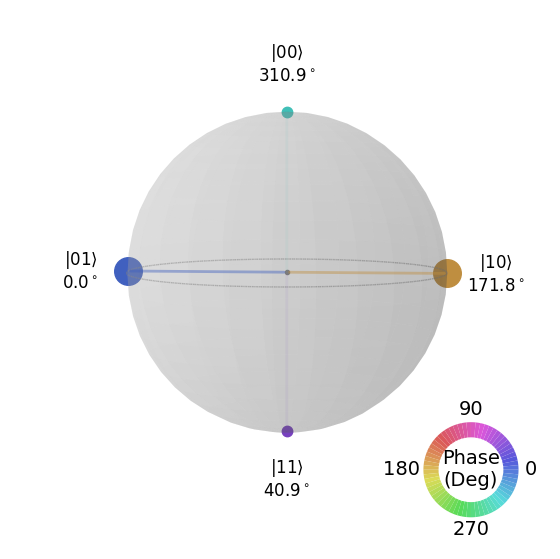

In [ ]:
from qiskit.quantum_info import DensityMatrix
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere
 
# Create a circuit with various quantum gates
qc = QuantumCircuit(2)
qc.h([0, 1])        # Hadamard on both: creates equal superposition
qc.cz(0, 1)         # Controlled-Z: entangles qubits with phase kick
qc.ry(np.pi/3, 0)   # Rotation around Y-axis by 60° on qubit 0
qc.rx(np.pi/6, 1)   # Rotation around X-axis by 30° on qubit 1
qc.z(1)             # Z gate on qubit 1: global phase shift
 
# Use density matrix representation
matrix = DensityMatrix(qc)
print("Circuit creates a complex entangled state with custom rotations")
 
# Enhanced Q-sphere visualization
plot_state_qsphere(matrix,
     show_state_phases=True,    # Show phase arrows for each basis state
     use_degrees=True,          # Display phases in degrees (0-360°)
     show_state_labels =True)

# - Multiple basis states have non-zero amplitudes
# - Phase colors show complex phases introduced by rotation gates
# - Degrees make phase values more intuitive (0° = +1, 180° = -1, etc.)